### In this comprehensive quick start, we will build a support chatbot in LangGraph that can:

* Answer common questions by searching the web

* Maintain conversation state across calls

* Route complex queries to a human for review

* Use custom state to control its behavior

* Rewind and explore alternative conversation paths

#### We'll start with a basic chatbot and progressively add more sophisticated capabilities, introducing key LangGraph concepts along the way.

In [1]:
!pip install -q langgraph langsmith langchain-groq

In [2]:
import os
from getpass import getpass

In [3]:
def _set_env(var: str):
  if not os.environ.get(var):
    os.environ[var] = getpass(f"Enter {var}: ")



_set_env("GROQ_API_KEY")

_LangSmith makes it a lot easier to see what's going on "under the hood."_

In [5]:
os.environ['LANGCHAIN_TRACING_V2'] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

## Part 1: Build a Basic Chatbot


We'll first create a simple chatbot using LangGraph. This chatbot will respond directly to user messages. Though simple, it will illustrate the core concepts of building with LangGraph. By the end of this section, you will have a built rudimentary chatbot.

#### Start by creating a `StateGraph`. A `StateGraph` object defines the structure of our chatbot as a "state machine". We'll add `nodes` to represent the llm and functions our chatbot can call and `edges` to specify how the bot should transition between these functions.

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


**Notice** that we've defined our State as a TypedDict with a single key: `messages`. The `messages` key is annotated with the `add_messages` function, which tells LangGraph to append new messages to the existing list, rather than overwriting it.

So now our graph knows two things:

1. Every node we define will receive the current State as input and return a value that updates that state.

2. `messages` will be appended to the current list, rather than directly overwritten. This is communicated via the prebuilt add_messages function in the Annotated syntax.


Next, add a `chatbot` node. Nodes represent units of work. They are typically regular python functions.

In [8]:
# from langchain_openai import OpenAI

# llm = OpenAI(model = "Mixtral-8x7b-32768", base_url="https://api.groq.com/openai/v1")

from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature=0,
    model="Mixtral-8x7b-32768")

def chatbot(state: State):
  '''The first argument is the unique node name.
  The second argument is the function or object that will be called whenever the node is used.'''
  return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)
print(graph_builder.nodes)

{'chatbot': NodeSpec(runnable=chatbot(recurse=True), metadata=None)}


The `add_messages` function in our `State` will append the llm's response messages to whatever messages are already in the state.

Next, add an entry point. This tells our graph **where to start its work** each time we run it.

In [9]:
graph_builder.add_edge(START, "chatbot")


Similarly, set a `finish` point. This instructs the graph "**any time this node is run, you can exit**."

In [10]:
graph_builder.add_edge("chatbot", END)


Finally, we'll want to be able to run our graph. To do so, call `compile()` on the graph builder. This creates a `CompiledGraph` we can use invoke on our state.

In [11]:
graph = graph_builder.compile()


You can visualize the graph using the `get_graph` method and one of the `draw` methods, like `draw_ascii` or `draw_png`.

The draw methods each require additional dependencies.

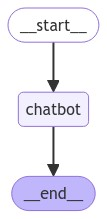

In [12]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass


Now let's run the chatbot!

**Tip**: You can exit the chat loop at any time by typing "quit", "exit", or "q".

In [16]:
# while True:
#   user_input = input("You: ")
#   if user_input.lower() in ["quit", "exit", "q"]:
#     break
#   for event in graph.stream({"messages": {"role": "user", "content": user_input}}):
#     for value in event.values():
#       print("Assistant:", value["messages"[-1].content])

while True:
  user_input = input("You: ")
  if user_input.lower() in ["quit", "exit", "q"]:
    break
  for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
    for value in event.values():
      print("Assistant:", value["messages"])

You:  hi


Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')


Assistant: [AIMessage(content="Hello! It's nice to meet you. Is there something specific you would like to talk about or ask me? I'm here to help with any questions you might have about writing, grammar, or language in general. Just let me know how I can assist you.", response_metadata={'token_usage': {'completion_time': 0.093688378, 'completion_tokens': 58, 'prompt_time': 0.001885808, 'prompt_tokens': 11, 'queue_time': None, 'total_time': 0.095574186, 'total_tokens': 69}, 'model_name': 'Mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-422bf2fa-3318-4853-8941-8fbaf05191c8-0', usage_metadata={'input_tokens': 11, 'output_tokens': 58, 'total_tokens': 69})]


You:  what is langsmith?


Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')
Unable to load requested LangChainTracer. To disable this warning, unset the LANGCHAIN_TRACING_V2 environment variables.
LangSmithUserError('API key must be provided when using hosted LangSmith API')


Assistant: [AIMessage(content='I\'m not aware of a specific term or concept called "langsmith." It\'s possible that there might be a typo or misunderstanding in the term. If you\'re looking for information about language development, linguistics, or language-related professions, I\'d be happy to help with those topics. Could you please provide more context or clarify what you\'re looking for?', response_metadata={'token_usage': {'completion_time': 0.132821313, 'completion_tokens': 83, 'prompt_time': 0.002031467, 'prompt_tokens': 15, 'queue_time': None, 'total_time': 0.13485278, 'total_tokens': 98}, 'model_name': 'Mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-85200abf-29ae-446b-9d66-8be5d024f585-0', usage_metadata={'input_tokens': 15, 'output_tokens': 83, 'total_tokens': 98})]


You:  q
